In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle
from skimage import measure, morphology

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

In [3]:
mask    = mpimg.imread('data/multi_recorte_2.png')[:,:,0]
mask    = utils.convert_8bits(mask)

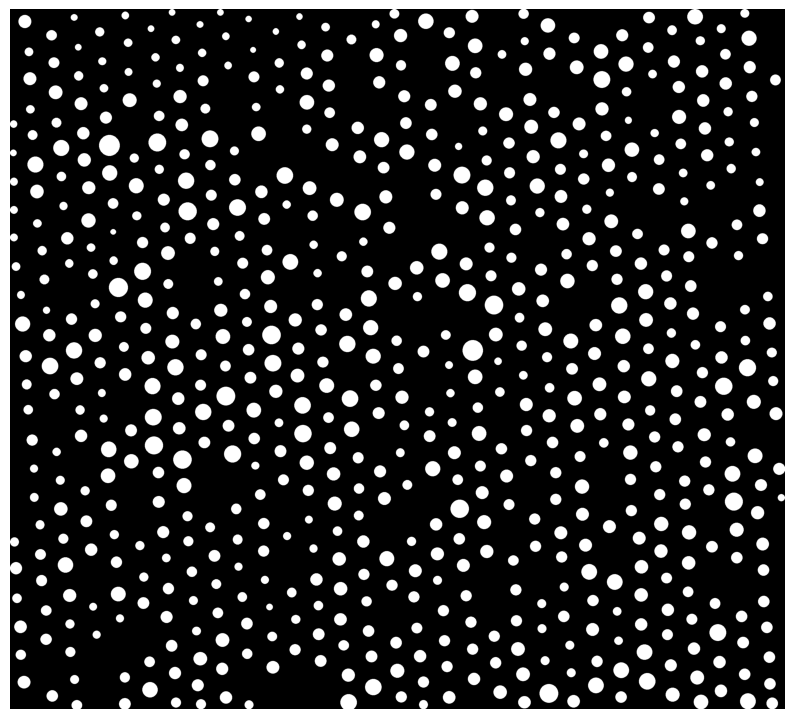

In [4]:
fig, axs = plt.subplots(figsize = (10,10))
axs.imshow(mask, cmap = 'gray')
axs.axis('off')
plt.show()

Number of objects: 667


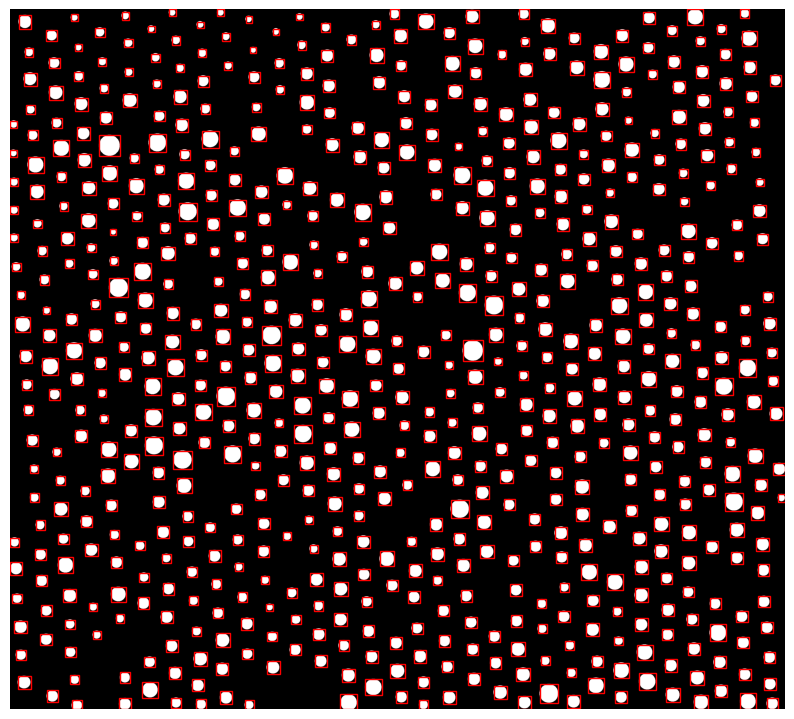

In [6]:
# Convert to 8 bits image
mask_thresh = utils.convert_8bits(mask)

# Close open circle countours
mask_thresh = morphology.closing(mask_thresh, morphology.square(5))

# Label the objects in the binary image
mask_labels, num_objects = measure.label(mask_thresh, background=0, return_num=True)

# Get the properties of the labeled regions
regions = measure.regionprops(mask_labels)



print(f'Number of objects: {num_objects}')

fig, axs = plt.subplots(figsize = (10,10))
axs.imshow(mask, cmap = 'gray')
axs.axis('off')

# Draw rectangles around each object
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = Rectangle((minc, minr), maxc - minc, maxr - minr, 
                     edgecolor='red', facecolor='none', linewidth=1)
    axs.add_patch(rect)

plt.show()